In [2]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
path = "https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [5]:
df = df.drop(columns= ["Id"])

In [6]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [26]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)


test r2:  -3.0715943247509893e+22
train r2:  0.9494518297088844
test rmse:  76190488351.17424
train rmse:  0.08606817747710854


In [27]:
summary = pd.DataFrame({"feature": X.columns, "wt": est.coef_})
summary["wt_abs"] = np.abs(summary.wt)
summary = summary.sort_values("wt_abs", ascending = False)
summary.head(10)

,feature,wt,wt_abs
15,GrLivArea,1.501695e+11,1.501695e+11
13,2ndFlrSF,-1.233520e+11,1.233520e+11
12,1stFlrSF,-1.112376e+11,1.112376e+11
219,GarageFinish_None,-1.072428e+11,1.072428e+11
134,Exterior2nd_CBlock,8.844505e+10,8.844505e+10
120,Exterior1st_CBlock,-8.844505e+10,8.844505e+10
224,GarageQual_None,7.930425e+10,7.930425e+10
229,GarageCond_None,7.930320e+10,7.930320e+10
166,BsmtCond_None,6.149525e+10,6.149525e+10
218,GarageType_None,-5.136464e+10,5.136464e+10


In [21]:
result = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
result["error"] = result.predict - result.actual
result["error_abs"] = np.abs(result.error)
result = result.sort_values("error_abs", ascending = False)
result.head(10)

,actual,predict,error,error_abs
1270,12.468437,1.281787e+12,1.281787e+12,1.281787e+12
375,11.018629,9.484743e+11,9.484743e+11,9.484743e+11
1003,11.827043,1.510345e+09,1.510345e+09,1.510345e+09
1011,11.512925,1.066149e+09,1.066149e+09,1.066149e+09
120,12.100712,5.829678e+08,5.829678e+08,5.829678e+08
325,11.373663,-5.983023e+06,-5.983035e+06,5.983035e+06
810,12.106252,1.126501e+03,1.114395e+03,1.114395e+03
1386,12.429216,1.126502e+03,1.114073e+03,1.114073e+03
462,11.041048,1.174476e+01,7.037119e-01,7.037119e-01
30,10.596635,1.125554e+01,6.589056e-01,6.589056e-01


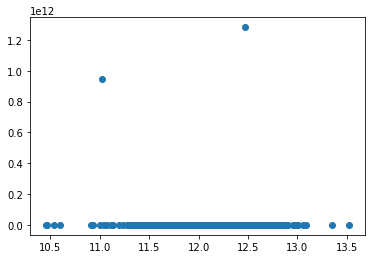

In [23]:
plt.scatter(y_test, y_test_pred)

In [33]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha=0.001, random_state=1))
])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)

print("intercept", est.intercept_)
summary = pd.DataFrame({"feature": X.columns, "wt": est.coef_})
summary["wt_abs"] = np.abs(summary.wt)
summary = summary.sort_values("wt_abs", ascending = False)
summary.head(10)

test r2:  0.8648308786585401
train r2:  0.9417975226233891
test rmse:  0.15982973314248985
train rmse:  0.09235504454648624
intercept 12.032638784447805


,feature,wt,wt_abs
110,RoofMatl_CompShg,0.189455,0.189455
114,RoofMatl_Tar&Grv,0.132195,0.132195
15,GrLivArea,0.113232,0.113232
116,RoofMatl_WdShngl,0.092549,0.092549
3,OverallQual,0.070931,0.070931
115,RoofMatl_WdShake,0.066035,0.066035
111,RoofMatl_Membran,0.048543,0.048543
5,YearBuilt,0.045461,0.045461
113,RoofMatl_Roll,0.042000,0.042000
4,OverallCond,0.036060,0.036060


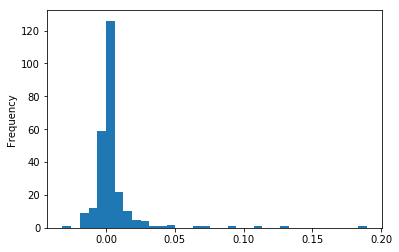

In [35]:
pd.Series(est.coef_).plot.hist(bins = 35)

In [34]:
result = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
result["error"] = result.predict - result.actual
result["error_abs"] = np.abs(result.error)
result = result.sort_values("error_abs", ascending = False)
result.head(10)

,actual,predict,error,error_abs
120,12.100712,10.601555,-1.499158,1.499158
30,10.596635,11.474458,0.877824,0.877824
495,10.460242,11.337666,0.877424,0.877424
916,10.471950,11.158687,0.686738,0.686738
462,11.041048,11.709700,0.668652,0.668652
812,10.932982,11.521296,0.588314,0.588314
968,10.542706,11.034659,0.491953,0.491953
1432,11.074421,11.539334,0.464914,0.464914
1000,11.314475,10.879646,-0.434828,0.434828
970,11.813030,11.384298,-0.428732,0.428732
